<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/show_warning_test_latest_fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null


In [3]:
!pip install torch torchvision --upgrade > /dev/null



In [4]:
!pip install fastai2 --upgrade > /dev/null

In [5]:
!pip freeze | grep fastai2
!pip freeze | grep torch

fastai2==0.0.21
torch==1.6.0+cu101
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.7.0+cu101


In [6]:
!nvidia-smi

Thu Jul 30 10:58:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
# import warnings
# warnings.filterwarnings('ignore')

In [8]:
from fastai2.vision.all import *

In [9]:
path = untar_data(URLs.MNIST)

In [10]:
Path.BASE_PATH = path

In [11]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [12]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='training',valid_name='testing'),
    item_tfms=Resize(50),
    batch_tfms=[*aug_transforms(do_flip=False,size=28,min_scale=0.9, max_warp=0.2, max_rotate=5,max_zoom=1.2), Normalize]
)

In [13]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_png/training/9/46706.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_png/training/9/46706.png
    applying parent_label gives
      9
    applying Categorize gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(9))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm -> Normalize

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=28x28, TensorCat

In [14]:
default_device()

device(type='cuda', index=0)

In [15]:
bs = 256

In [16]:
dls = datablock.dataloaders(path, bs=bs)

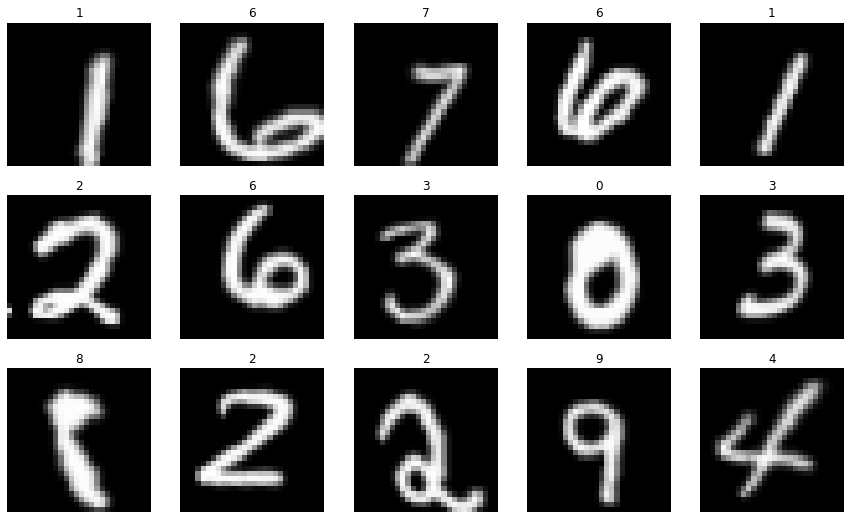

In [17]:
dls.show_batch(max_n=15)

In [18]:
learner = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [19]:
learner.fine_tune(4, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.471608,0.814764,0.745000,0.255000,01:43
1,0.865466,0.523602,0.832600,0.167400,01:42
2,0.565046,0.345497,0.888900,0.111100,01:42
3,0.374279,0.241279,0.922200,0.077800,01:42


/usr/local/lib/python3.6/dist-packages/fastai2/callback/schedule.py:68: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx = (pos >= pcts).nonzero().max()


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.130644,0.077949,0.974500,0.025500,01:45
1,0.072324,0.044070,0.985400,0.014600,01:46
2,0.050985,0.034867,0.988200,0.011800,01:46
3,0.036885,0.031114,0.990000,0.010000,01:46


In [ ]:
learner.save('stage-1')

In [ ]:
default_device()

device(type='cuda', index=0)

In [ ]:
warnings.resetwarnings()

In [ ]:
pos = 0.6

In [ ]:
pcts = [0.2,0.3,0.5]

In [ ]:
assert sum(pcts) == 1.

In [ ]:
pcts = tensor([0] + L(pcts));pcts

tensor([0.0000, 0.2000, 0.3000, 0.5000])

In [ ]:
assert torch.all(pcts >= 0)

In [ ]:
pcts = torch.cumsum(pcts, 0);pcts

tensor([0.0000, 0.2000, 0.5000, 1.0000])

In [ ]:
w = (pos >= pcts);w

tensor([ True,  True,  True, False])

In [ ]:
u = w.nonzero()

In [ ]:
u2 = w.nonzero()

In [ ]:
idx = (pos >= pcts).nonzero().max(); idx

In [ ]:
cos_sched = combined_cos(0.3, 0.25,0.5, 0.9)

In [ ]:
res = cos_sched(0.4);res

In [ ]:
learner.lr_find()